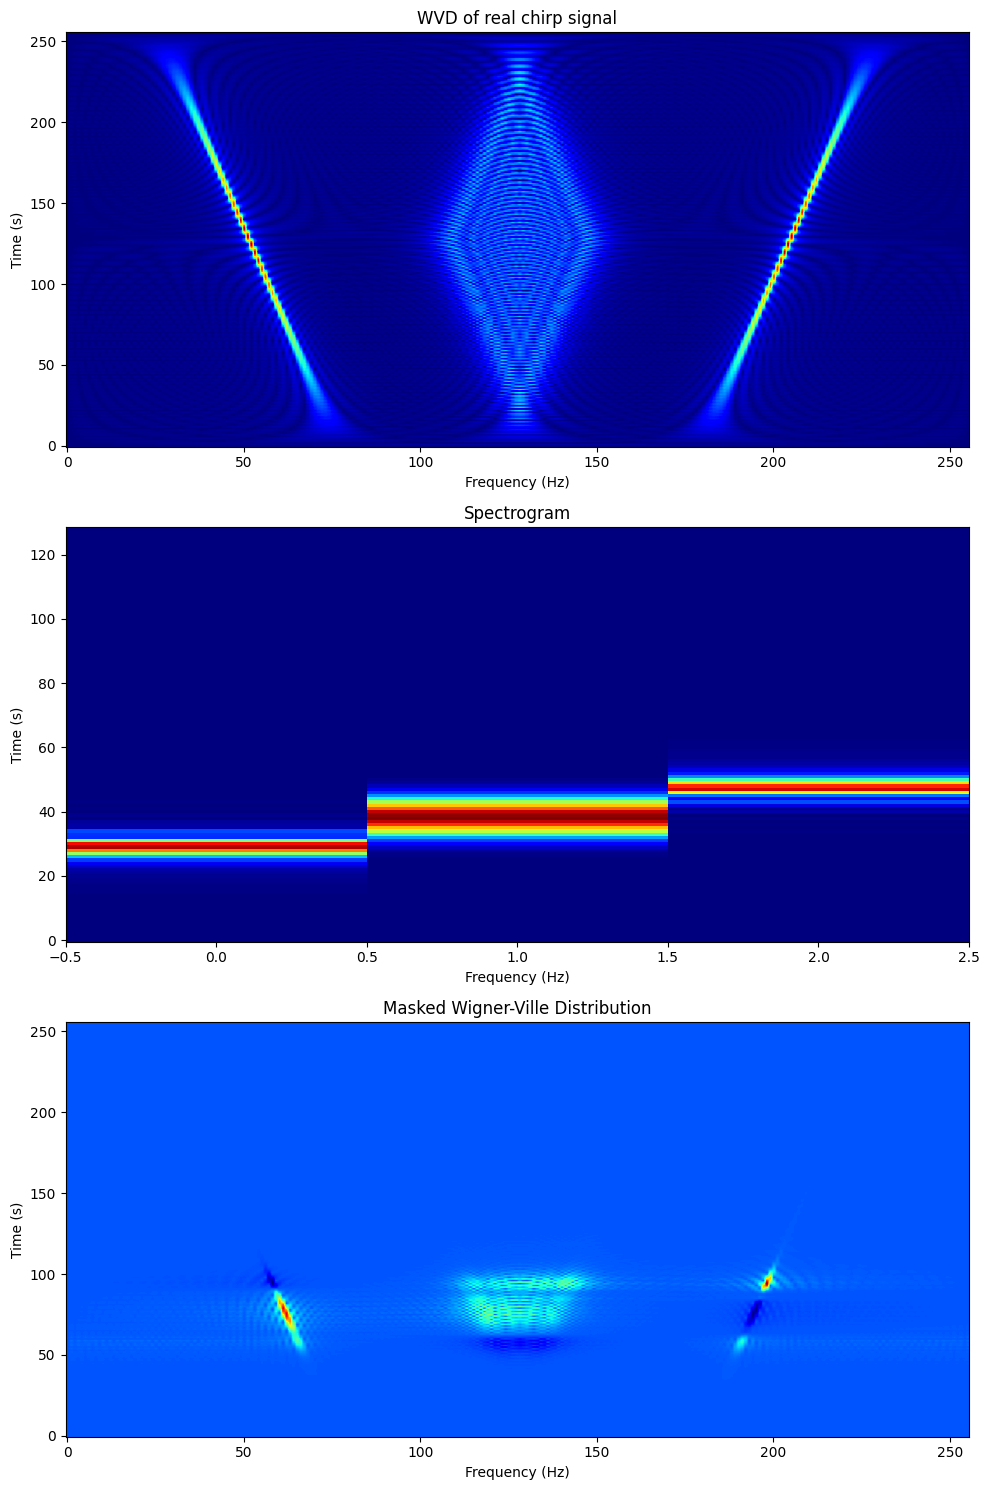

In [68]:
import numpy as np
import matplotlib.pyplot as plt
#from google.colab import files
from scipy.signal import stft, resample

T = 256
N = 256
dt = 1.0
f0 = 0.1
fe = 0.2
a = (fe - f0) / T
t = np.linspace(0, T, N, endpoint=False)  # 時間軸
A = 1
s = A * np.cos(2 * np.pi * (f0 * t + (a / 2) * t**2))

s0 = np.zeros(int(N / 2))
tmp = np.concatenate([s0, s], 0)
es = np.concatenate([tmp, s0], 0)

Kz = np.empty((N, N), complex)
for tt in range(N):
    s1 = es[tt:tt + N]
    s2 = np.flip(np.conjugate(s1))
    S = s1 * s2
    Kz[:, tt] = S

Ws = np.fft.fft(Kz, axis=0)
WD = abs(Ws.T)
WD_roll = np.roll(WD, int(N / 2), 1)

f,t,Zxx = sg.stft(s, fs=1.0,window='hamming',nperseg=256)
spectrogram = np.abs(Zxx)**2

spectrogram_resampled = resample(spectrogram, WD_roll.shape[0], axis=0)
spectrogram_resampled = resample(spectrogram_resampled, WD_roll.shape[1], axis=1)

MWVD = WD_roll * spectrogram_resampled

# 表示
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

axs[0].imshow(WD_roll, cmap='jet', origin='lower', aspect='auto')
axs[0].set_title('WVD of real chirp signal')
axs[0].set_xlabel('Frequency (Hz)')
axs[0].set_ylabel('Time (s)')

axs[1].imshow(spectrogram, cmap='jet', origin='lower', aspect='auto')
axs[1].set_title('Spectrogram')
axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('Time (s)')

axs[2].imshow(MWVD, cmap='jet', origin='lower', aspect='auto')
axs[2].set_title('Masked Wigner-Ville Distribution')
axs[2].set_xlabel('Frequency (Hz)')
axs[2].set_ylabel('Time (s)')

plt.tight_layout()
plt.show()